In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

1. Import the necessary libraries and read the data.

In [6]:
data = pd.read_csv("fifa.csv")
data.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.shape

(18207, 60)

In [5]:
pd.set_option("display.max_columns", None)

In [7]:
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€1

In [8]:
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [9]:
( (data.isnull().sum())/len(data) ) * 100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

In [10]:
data = data.drop(columns=["Loaned From","Photo","Flag","Club Logo"])

In [11]:
data.shape

(18207, 56)

# Changing the Columns into format

1) Value

In [12]:
data["Value"] = list(map(lambda x : x.replace("€",""),data["Value"]))

In [13]:
data["Value"] = data["Value"].map(str)

In [14]:
data["Value"]

0        110.5M
1           77M
2        118.5M
3           72M
4          102M
          ...  
18202       60K
18203       60K
18204       60K
18205       60K
18206       60K
Name: Value, Length: 18207, dtype: object

In [15]:
for i in data.index:
    if data["Value"][i][-1]=="M":
        data["Value"][i]=float(data["Value"][i].replace("M",""))*1000000
    elif data["Value"][i][-1]=="K":
        data["Value"][i]=float(data["Value"][i].replace("K",""))*1000

In [16]:
data["Value"]

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: object

In [17]:
data["Value"] = data["Value"].astype(np.number)

In [18]:
data["Value"]

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

2) Wage

In [19]:
data["Wage"] = list(map(lambda x : x.replace("€",""),data["Wage"]))

In [20]:
data["Wage"]

0        565K
1        405K
2        290K
3        260K
4        355K
         ... 
18202      1K
18203      1K
18204      1K
18205      1K
18206      1K
Name: Wage, Length: 18207, dtype: object

In [21]:
data["Wage"] = data["Wage"].map(str)

In [22]:
for i in data.index:
    if data["Wage"][i][-1]=="M":
        data["Wage"][i]=float(data["Wage"][i].replace("M",""))*1000000
    elif data["Wage"][i][-1]=="K":
        data["Wage"][i]=float(data["Wage"][i].replace("K",""))*1000

In [23]:
data["Wage"] = data["Wage"].astype(np.number)

In [24]:
data["Wage"]

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

3) Joined

In [25]:
data.dropna(subset = ["Joined"],inplace=True)

In [26]:
data["Joined"] = list(map(lambda x : int(x.split(",")[-1].replace(" ","")),data["Joined"]))

In [27]:
data["Joined"] = data["Joined"].astype("int")

In [28]:
data["Joined"]

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 16654, dtype: int32

4) Contract Valid Until

In [29]:
data['Contract Valid Until'] = data['Contract Valid Until'].astype("datetime64[ns]")

In [30]:
data["Contract Valid Until"]

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 16654, dtype: datetime64[ns]

5) Height and weight

In [32]:
data["Height"] = data["Height"].map(str)
data["Height"]

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 16654, dtype: object

In [35]:
for i in data.index:
    data["Height"][i]=data["Height"][i].replace("'",".")


In [36]:
data["Height"]=data["Height"].astype("float")

In [37]:
data["Height"]

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 16654, dtype: float64

In [38]:
data["Weight"]=data["Weight"].map(str)

In [39]:
for i in data.index:
    data["Weight"][i]=data["Weight"][i].replace("lbs","")

In [40]:
data["Weight"]=data["Weight"].astype(float)

In [41]:
data["Weight"]


0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 16654, dtype: float64

In [42]:
data["Release Clause"] = data["Release Clause"].map(str)

In [43]:
data["Release Clause"] = list(map(lambda x : x.replace("€",""),data["Release Clause"]))

In [44]:
for i in data["Release Clause"].index:
    if data["Release Clause"][i][-1] == "M":
        data["Release Clause"][i] = float(data["Release Clause"][i].replace("M",""))*1000000
    
    elif data["Release Clause"][i][-1] == "K":
        data["Release Clause"][i] = float(data["Release Clause"][i].replace("K",""))*1000

In [45]:
data["Release Clause"] = data["Release Clause"].astype(np.number)

In [46]:
data["Release Clause"]

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 16654, dtype: float64

In [48]:
data["Release Clause"] = data["Release Clause"].fillna(data["Release Clause"].median())


# EDA

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        16654 non-null  int64         
 1   Name                      16654 non-null  object        
 2   Age                       16654 non-null  int64         
 3   Nationality               16654 non-null  object        
 4   Overall                   16654 non-null  int64         
 5   Potential                 16654 non-null  int64         
 6   Club                      16654 non-null  object        
 7   Value                     16654 non-null  float64       
 8   Wage                      16654 non-null  float64       
 9   Preferred Foot            16654 non-null  object        
 10  International Reputation  16654 non-null  float64       
 11  Weak Foot                 16654 non-null  float64       
 12  Skill Moves       

In [50]:
data.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

# 1.1.	Plot the distribution of Overall rating for all players

In [51]:
data = data.sort_index(axis = 1,ascending = True)

In [52]:
over = data.groupby("Name")["Overall"].mean()
over.mean()

66.14729035430692

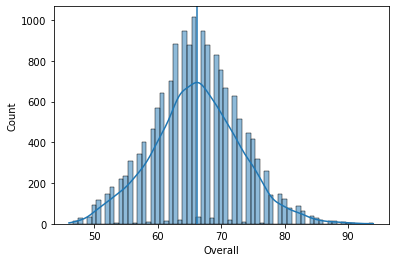

In [53]:
sns.histplot(over,kde = True)
plt.axvline(66.14729035)

# 2.Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


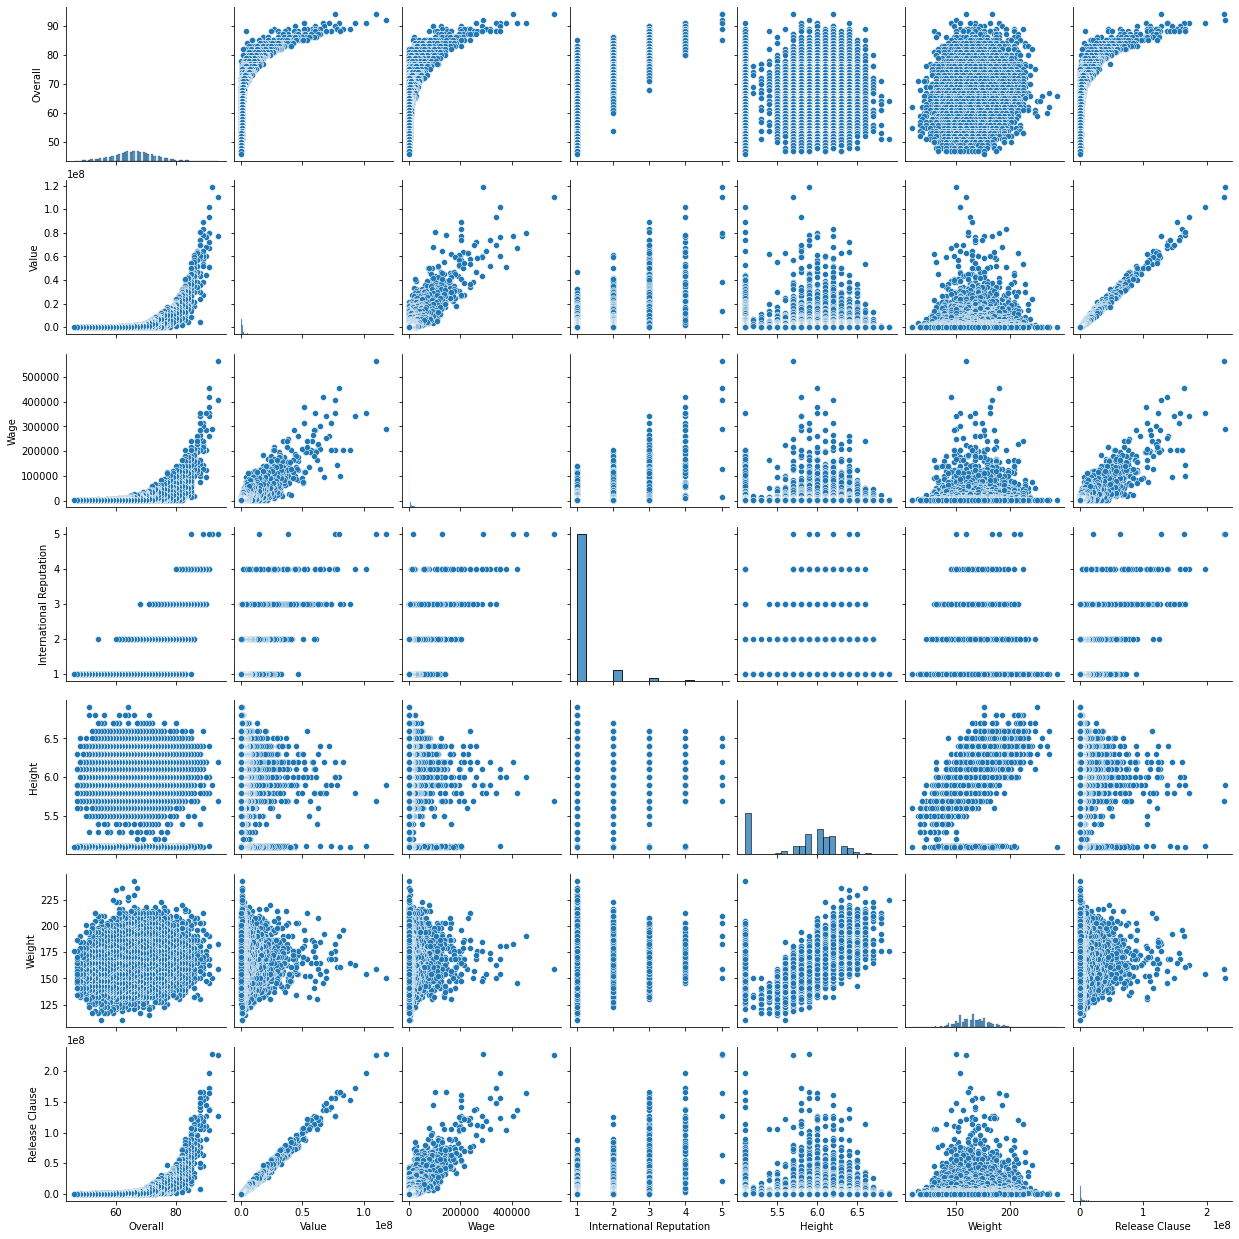

In [55]:
sns.pairplot(data[["Overall","Value","Wage","International Reputation","Height","Weight","Release Clause"]])


# Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [56]:
data2 = data.copy()

In [58]:
data2["Contract Valid Until"] = list(map(lambda x : x.year,data["Contract Valid Until"]))
data2["Contract Valid Until"]

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 16654, dtype: int64

In [60]:
data2020 = data2[data2["Contract Valid Until"] == 2020]

In [61]:
data20_split = data2020.sort_values(by = ["Overall"],ascending = False).head(20)

In [62]:
data20_split

,Acceleration,Age,Aggression,Agility,Balance,BallControl,Body Type,Club,Composure,Contract Valid Until,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Height,ID,Interceptions,International Reputation,Jersey Number,Joined,Jumping,LongPassing,LongShots,Marking,Name,Nationality,Overall,Penalties,Position,Positioning,Potential,Preferred Foot,Reactions,Release Clause,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Weight,Work Rate
3,57.0,27,38.0,60.0,43.0,42.0,Lean,Manchester United,68.0,2020,17.0,21.0,18.0,19.0,13.0,90.0,85.0,87.0,88.0,94.0,21.0,6.40,193080,30.0,4.0,1.0,2011,67.0,51.0,12.0,15.0,De Gea,Spain,91,40.0,GK,12.0,93,Right,90.0,138600000.0,50.0,31.0,1.0,13.0,58.0,43.0,21.0,64.0,72000000.0,68.0,13.0,260000.0,3.0,168.0,Medium/ Medium
6,80.0,32,62.0,93.0,94.0,93.0,Lean,Real Madrid,84.0,2020,86.0,85.0,90.0,78.0,72.0,13.0,9.0,7.0,14.0,9.0,55.0,5.80,177003,83.0,4.0,10.0,2012,68.0,88.0,82.0,60.0,L. Modrić,Croatia,91,82.0,RCM,79.0,91,Right,90.0,137400000.0,93.0,79.0,4.0,73.0,72.0,89.0,76.0,58.0,67000000.0,92.0,76.0,420000.0,4.0,146.0,High/ High
8,76.0,32,88.0,78.0,66.0,84.0,Normal,Real Madrid,82.0,2020,66.0,74.0,63.0,72.0,60.0,11.0,8.0,9.0,7.0,11.0,91.0,6.00,155862,90.0,4.0,15.0,2005,93.0,77.0,59.0,87.0,Sergio Ramos,Spain,91,75.0,RCB,60.0,91,Right,85.0,104600000.0,78.0,79.0,3.0,91.0,75.0,84.0,92.0,83.0,51000000.0,63.0,66.0,380000.0,3.0,181.0,High/ Medium
5,94.0,27,54.0,95.0,94.0,94.0,Normal,Chelsea,91.0,2020,81.0,83.0,95.0,79.0,84.0,11.0,12.0,6.0,8.0,8.0,61.0,5.80,183277,41.0,4.0,10.0,2012,56.0,83.0,80.0,34.0,E. Hazard,Belgium,91,86.0,LF,87.0,91,Right,90.0,172100000.0,89.0,82.0,4.0,22.0,88.0,83.0,27.0,66.0,93000000.0,89.0,80.0,340000.0,4.0,163.0,High/ Medium
13,70.0,32,57.0,92.0,90.0,94.0,Normal,Manchester City,93.0,2020,84.0,82.0,89.0,77.0,76.0,6.0,15.0,7.0,6.0,12.0,54.0,5.80,168542,50.0,4.0,21.0,2010,64.0,87.0,75.0,59.0,David Silva,Spain,90,75.0,LCM,89.0,90,Left,90.0,111000000.0,93.0,72.0,4.0,29.0,64.0,78.0,53.0,52.0,60000000.0,92.0,82.0,285000.0,2.0,148.0,High/ Medium
21,75.0,31,84.0,77.0,59.0,82.0,Lean,Paris Saint-Germain,82.0,2020,70.0,77.0,80.0,76.0,89.0,12.0,5.0,13.0,13.0,10.0,89.0,6.10,179813,48.0,4.0,21.0,2013,88.0,52.0,79.0,52.0,E. Cavani,Uruguay,89,85.0,LS,93.0,89,Right,91.0,111000000.0,78.0,87.0,3.0,39.0,76.0,92.0,45.0,78.0,60000000.0,77.0,90.0,200000.0,4.0,170.0,High/ High
24,63.0,33,92.0,54.0,55.0,57.0,Normal,Juventus,84.0,2020,58.0,60.0,58.0,31.0,33.0,3.0,3.0,2.0,4.0,3.0,83.0,6.20,138956,88.0,4.0,3.0,2005,89.0,59.0,49.0,93.0,G. Chiellini,Italy,89,50.0,LCB,28.0,89,Left,82.0,44600000.0,59.0,78.0,2.0,90.0,75.0,65.0,93.0,89.0,27000000.0,50.0,45.0,215000.0,3.0,187.0,Medium/ High
31,75.0,26,46.0,79.0,81.0,91.0,Lean,Tottenham Hotspur,88.0,2020,88.0,86.0,84.0,87.0,80.0,9.0,14.0,7.0,7.0,6.0,52.0,5.11,190460,56.0,3.0,10.0,2013,50.0,88.0,89.0,59.0,C. Eriksen,Denmark,88,67.0,CAM,83.0,91,Right,88.0,141500000.0,91.0,84.0,4.0,22.0,73.0,92.0,57.0,58.0,73500000.0,91.0,77.0,205000.0,5.0,168.0,High/ Medium
39,70.0,33,76.0,68.0,68.0,80.0,Normal,Paris Saint-Germain,81.0,2020,60.0,61.0,62.0,64.0,38.0,9.0,12.0,5.0,9.0,10.0,81.0,6.00,164240,89.0,4.0,2.0,2012,90.0,80.0,68.0,88.0,Thiago Silva,Brazil,88,60.0,RCB,59.0,88,Right,82.0,44400000.0,80.0,71.0,2.0,85.0,72.0,74.0,89.0,82.0,24000000.0,72.0,63.0,165000.0,3.0,181.0,Medium/ High
50,93.0,31,59.0,94.0,92.0,89.0,Normal,Napoli,81.0,2020,77.0,82.0,91.0,79.0,86.0,7.0,10.0,8.0,10.0,4.0,35.0,5.70,175943,36.0,3.0,14.0,2013,60.0,74.0,81.0,25.0,D. Mertens,Belgium,87,79.0,RF,87.0,87,Right,88.0,76500000.0,82.0,80.0,4.0,40.0,85.0,75.0,40.0,42.0,45000000.0,83.0,70.0,135000.0,4.0,134.0,High/ Low


What would the average wage for this set of players be?

In [63]:
data20_split["Wage"].mean()

205450.0

# What is the average age?

In [64]:
data20_split["Age"].mean()

30.65

# Is there a correlation between the Overall rating and Value for these players

In [66]:
data20_split[["Overall","Value"]].corr()

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


# Generate tables containing the top 5 players by Overall rating for each unique position

In [67]:
data["Overall"]

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 16654, dtype: int64

In [68]:
indp = data["Position"].value_counts().index
indp

Index(['ST', 'GK', 'CB', 'CM', 'LB', 'RB', 'RM', 'LM', 'CAM', 'CDM', 'RCB',
       'LCB', 'RCM', 'LCM', 'LW', 'RW', 'RDM', 'LDM', 'LS', 'RS', 'RWB', 'LWB',
       'CF', 'RAM', 'LAM', 'LF', 'RF'],
      dtype='object')

In [69]:
a = data[data["Position"] == indp[1]].groupby(["Name"])[["Overall"]].max().reset_index().sort_values("Overall",ascending = False).head(5)
a

,Name,Overall
453,De Gea,91
830,J. Oblak,90
1211,M. Neuer,89
1699,T. Courtois,89
1280,M. ter Stegen,89


In [70]:
data_list = []
ch = 0
for i in indp:
    data_list.append([i,data[data["Position"] == i].groupby(["Name","Wage"])[["Overall"]].max().reset_index().sort_values("Overall",ascending = False).head(5)])
    ch+=1
data_diction = dict(data_list)
data_diction["LB"]

,Name,Wage,Overall
889,Marcelo,285000.0,88
633,Jordi Alba,250000.0,87
115,Alex Sandro,160000.0,86
256,D. Alaba,110000.0,85
427,Filipe Luís,81000.0,85


In [71]:
for i in range(len(indp)):
    globals()['table%s' % i] =  data[data["Position"] == indp[i]].groupby(["Name","Wage"])[["Overall"]].max().reset_index().sort_values("Overall",ascending = False).head(5)

# Are there any players appearing in more than one Table. Please point out such players.

In [72]:
l = []
for i in data_diction.values():
    l.extend((list(i["Name"])))

s= set(l)    
print("len of names in list : ",len(l))
print("len of names after converting list to set is : ",len(s))

if len(l) == len(s):
    print("There are no unique player")
else :
    print("There are unique players")

len of names in list :  135
len of names after converting list to set is :  135
There are no unique player


# What is the average wage one can expect to pay for the top 5 in every position?

In [73]:
for i,j in data_diction.items():
    print("For",i,"The average wage is : ",j["Wage"].mean())

For ST The average wage is :  294000.0
For GK The average wage is :  192800.0
For CB The average wage is :  139600.0
For CM The average wage is :  124800.0
For LB The average wage is :  177200.0
For RB The average wage is :  155400.0
For RM The average wage is :  123400.0
For LM The average wage is :  152600.0
For CAM The average wage is :  174000.0
For CDM The average wage is :  199200.0
For RCB The average wage is :  219000.0
For LCB The average wage is :  162000.0
For RCM The average wage is :  252200.0
For LCM The average wage is :  203000.0
For LW The average wage is :  261000.0
For RW The average wage is :  202000.0
For RDM The average wage is :  105000.0
For LDM The average wage is :  92400.0
For LS The average wage is :  92200.0
For RS The average wage is :  130400.0
For RWB The average wage is :  44200.0
For LWB The average wage is :  30000.0
For CF The average wage is :  47400.0
For RAM The average wage is :  46600.0
For LAM The average wage is :  21800.0
For LF The average w